# 1. Introduction to Time Series

This class is based on:
- [Avishek Pal, PKS Prakash (2017). Practical time series analysis: master time series data processing[...]](https://universidadefe957-my.sharepoint.com/:b:/g/personal/paulo_firmino_ufca_edy_br/EY6upDI8ktJKnCQlqns9kz4BhFko1dcOehhwcyw7JE4JuQ?e=WMhXbd),
- [Cryer (2008). Time Series Analysis With Applications](https://1drv.ms/b/s!Ajft4xxB-ttTgcEdbTEZ73YWkZ_JPQ?e=WkIqqA). 

The codes can be found [here](https://github.com/PacktPublishing/Practical-Time-Series-Analysis/tree/master/.)

## General Imports

In [13]:
#IMPORT
from __future__ import print_function#to enable using print as a function for readers who might be using a 2.x version of Python
import os
import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
#READING DATA
#
# os.chdir('D:\Practical Time Series')
# data = pd.read_csv('..\..\data\TimeSeries\WDIData.csv')
# display(data)

# Autocorrelation and Partial autocorrelation

Again, let $\{X_t: t = 0, 1, \dots\}$ be a stochasdtic process and $\{x_t: t = 0, 1, \dots\}$ the respective time series.

After applying the mathematical transformations discussed in the previous section, we will often be left with what is known as a stationary (or weakly stationary) time series, which is characterized by a constant mean $E(X_t) = \mu$ and variance $Var(X_t) = \sigma^2$ and correlation $Corr(X_t, X_{t+h}) = \rho_{t, t+h}$ that depends only on the time lag between two time steps ($t$, $t+h$), but independent of the value of the time step. This type of covariance is the key in time series analysis and is called autocovariance (or autocorrelation when normalized to the range of -1 to 1).

The autocovariance function, $\gamma_{t,t+h}$, is defined as

$Cov(X_t, X_{t+h}) = \gamma_{t,t+h} = E[(X_t − \mu_t)(X_{t+h} − \mu_{t+h})] = E(X_t X_{t+h}) − \mu_t \mu_{t+h}$.

The autocorrelation function, $\rho_{t,t+h}$, is given by

$Corr(X_t, X_{t+h}) = \frac{Cov(X_t, X_{t+h})}{\sigma^2}$

Autocorrelation is therefore expressed as the
second order moment $E(X_t,X_{t+h}) = g(h)$ that evidently is a function of only the time lag $h$ and
independent of the actual time index $t$, $\rho_{t, t+h} = \rho_{h}$. This special definition of autocorrelation ensures
that it is a time-independent property and hence can be reliably used for making inference
about future realization of the time series.

The Down Jones dataset for this exercise has been downloaded from [Yahoo! Finance](http://finance.yahoo.com).

In [14]:
# %pip install yfinance
# %pip install yahoofinancials
# from yahoofinancials import YahooFinancials
# yahoo_financials = YahooFinancials('AAPL')
# data = yahoo_financials.get_historical_price_data(start_date='2019-01-01', 
#                                                   end_date='2019-12-31', 
#                                                   time_interval='weekly')
# aapl_df = pd.DataFrame(data['AAPL']['prices'])
# aapl_df = aapl_df.drop('date', axis=1).set_index('formatted_date')
# aapl_df.head()

In [15]:
dj = pd.read_csv('../../data/TimeSeries/DJI.csv', parse_dates=['Date'])
display(dj.head(2))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-06-10,32053.519531,32053.519531,31387.839844,31392.789063,31392.789063,362300000
1,2022-06-13,31144.910156,31144.910156,30373.720703,30516.740234,30516.740234,472290000


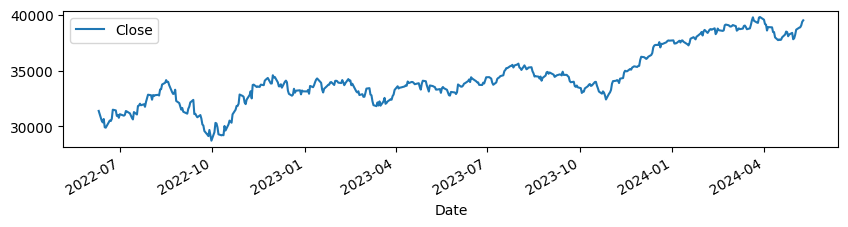

In [16]:
figsize = (10,2)
dj.plot(figsize=figsize, x='Date', y='Close');

In [17]:
dj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482 entries, 0 to 481
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       482 non-null    datetime64[ns]
 1   Open       482 non-null    float64       
 2   High       482 non-null    float64       
 3   Low        482 non-null    float64       
 4   Close      482 non-null    float64       
 5   Adj Close  482 non-null    float64       
 6   Volume     482 non-null    int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 26.5 KB


## Trend modeling

In [18]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(fit_intercept=True)
trend_model.fit(np.array(dj.index).reshape((-1,1)), dj['Close'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0],
    trend_model.intercept_))

Trend model coefficient=15.723707022870041 and intercept=30545.97794031718


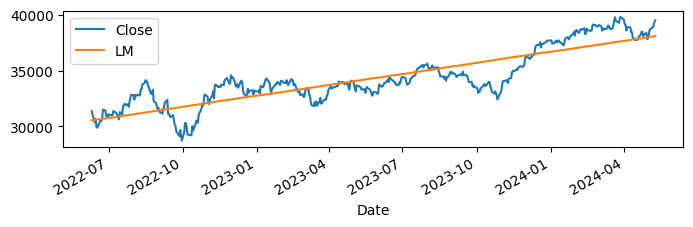

In [19]:
figsize = (8, 2);
dj['LM'] = trend_model.predict(np.array(dj.index).reshape((-1,1)))
dj.plot(x='Date', y=['Close', 'LM'], figsize=figsize);

## Trend model residuals modeling

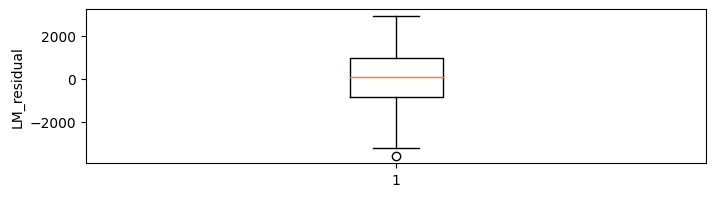

In [20]:
dj['LM_res'] = dj['Close'].subtract(
    trend_model.predict(np.array(dj.index).reshape((-1,1))))
plt.figure(figsize=figsize);
plt.boxplot(dj['LM_res'])
plt.ylabel('LM_residual');

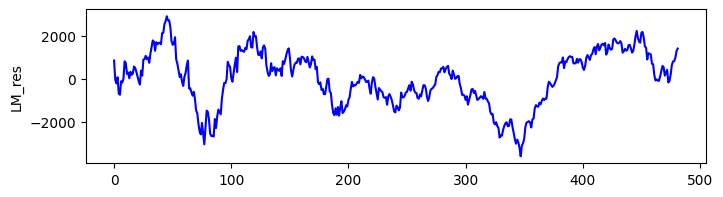

In [21]:
dj['LM_res'].plot(color='b', figsize=figsize, ylabel='LM_res');

In [22]:
nDj = dj[['Date', 'Close', 'LM', 'LM_res']]
nDj.columns = ['date', 'y(t)', 'p1(t)', 'e1(t)']
nDj['e1(t-1)'] = nDj['e1(t)'].shift(1).values
nDj.head(5)

C:\Users\praf6\AppData\Local\Temp\ipykernel_9712\2818822273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nDj['e1(t-1)'] = nDj['e1(t)'].shift(1).values


,date,y(t),p1(t),e1(t),e1(t-1)
0,2022-06-10,31392.789063,30545.977940,846.811123,NaN
1,2022-06-13,30516.740234,30561.701647,-44.961413,846.811123
2,2022-06-14,30364.830078,30577.425354,-212.595276,-44.961413
3,2022-06-15,30668.529297,30593.149061,75.380236,-212.595276
4,2022-06-16,29927.070313,30608.872768,-681.802455,75.380236


>> correlation matrix:
           e1(t-1)     e1(t)
e1(t-1)  1.000000  0.972476
e1(t)    0.972476  1.000000


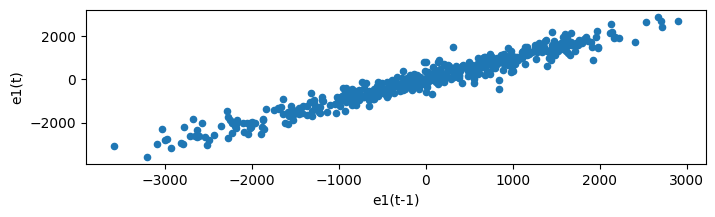

In [23]:
nDj.plot(x='e1(t-1)', y='e1(t)', figsize=figsize, kind='scatter');
print('>> correlation matrix:\n', nDj[['e1(t-1)', 'e1(t)']].corr(method='pearson'))

C:\Users\praf6\AppData\Local\Temp\ipykernel_9712\3306685716.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nDj['e1(t-2)'] = nDj['e1(t)'].shift(2)


>> correlation matrix:
           e1(t-2)     e1(t)
e1(t-2)  1.000000  0.944848
e1(t)    0.944848  1.000000


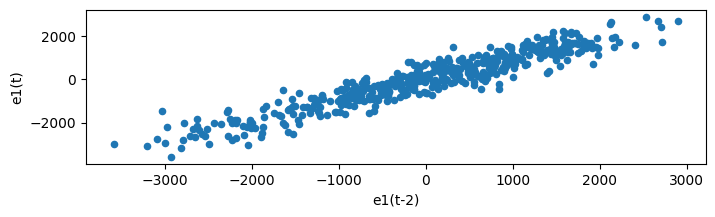

In [24]:
nDj['e1(t-2)'] = nDj['e1(t)'].shift(2)
nDj.plot(x='e1(t-2)', y='e1(t)', figsize=figsize, kind='scatter');
print('>> correlation matrix:\n', nDj[['e1(t-2)', 'e1(t)']].corr(method='pearson'))

### Autocorrelation

--> ac(1)= 0.9724758580308545
--> ac(2)= 0.9448476085887851


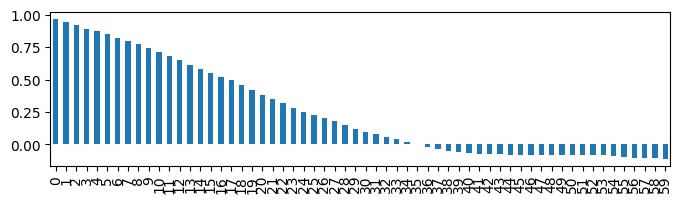

In [25]:
acs = []
for t in range(1, 61):#41
    acs.append(nDj['e1(t)'].autocorr(t, ))
    if t < 3:
        print('--> ac('+str(t)+')= '+str(acs[t-1]))
pd.Series(acs).plot(kind='bar', figsize=figsize);

The traditional autocorrelation in a lag may be contamiated by intermediate lags. So a different function is needed. Such a function may be defined as the correlation between $X_t$
and $X_{t-k}$ after removing the effect of the intervening variables $X_{t-1}, \dots, X_{t-k + 1}$. This coefficient is called the *partial autocorrelation* at lag $k$ and will be denoted
by $\phi_{kk}$. If $X_t$ is a normally distributed variable, we can let:

$\phi_{kk} = Corr(X_t, X_{t-k}|X_{t-1}, \dots, X_{t-k+1})$

An alternative approach, not based on normality, can be developed in the following
way. Consider predicting $X_t$ based on a linear function of the intervening variables 

$\hat{X}_t = f(X_{t-1},\dots, X_{t-k + 1})$ = $\sum_{i=1}^{k-1}\beta_i X_{t-i}$, 

with the $\beta$’s chosen to
minimize the mean square error of prediction. If we assume that the $\beta$’s have been so
chosen and then think backward in time, **it follows from stationarity** that the best “predictor” of $X_{t − k}$ based on the same $X_{t − 1},\dots, X_{t − k + 1}$ will be 


$\hat{X}_{t-k} = \sum_{i=1}^{k-1}\beta_i X_{t-k+i}$. 

Ex. (Studyng the lag) $k=3$: 

$\hat{X}_t = f(X_{t-1}, X_{t-2})$ = $\beta_1 X_{t-1} + \beta_2 X_{t-2}$

$\hat{X}_{t-3} = f(X_{t-1}, X_{t-2})$ = 
$\beta_1 X_{t-3+1} + \beta_2 X_{t-3+2}$
= $\beta_1 X_{t-2} + \beta_2 X_{t-1}$.


Then, considering the error $\varepsilon_t = X_t - \hat{X}_t$, the partial autocorrelation function at lag $k$ is then
defined to be the correlation between the prediction errors; that is, $\rho_{kk} = Corr(\varepsilon_t, \varepsilon_{t-k})$ 

For normally distributed series, it can be shown that the two definitions coincide. By
convention, we take $\rho_{11} = 1$.

<!--Autoregressive (AR) models capture this dependency as a (non)linear
regression between the $x_{t+k}$ and $x_t$. However, time series tend to carry information and
dependency structures in steps and therefore autocorrelation at lag $k$ is also influenced by
the intermediate variables $x_t, x_{t+1}…x_{t+k-1}$. Therefore, autocorrelation is not the
correct measure of the mutual correlation between $x_t$ and $x_{t+k}$ in the presence of the
intermediate variables. Hence, it would erroneous to choose $k$ in AR models based on
autocorrelation. _Partial autocorrelation solves this problem_ by measuring the correlation
between $x_t$ and $x_{t+k}$ when the influence of the intermediate variables has been removed.
Hence partial autocorrelation in time series analysis defines the correlation between $x_t$ and $x_{t+k}$ which is not accounted for by lags $t+1$ to $t+k-1$.

the plot_acf function of
statsmodels.graphics.tsaplots compute and plot the autocorrelation at various
lags. Additionally, this function also plots the 95% confidence intervals. Autocorrelation
outside these confidence intervals is statistically significant correlation while those which
are inside the confidence intervals are due to random noise.

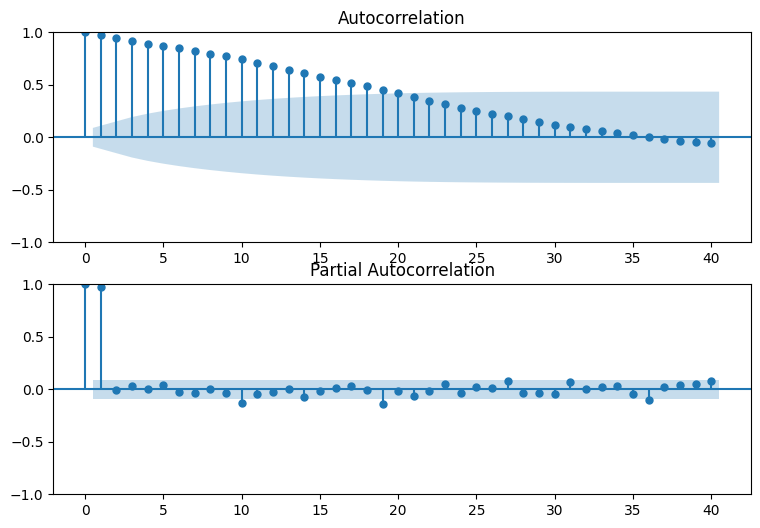

In [627]:
#%pip install statsmodels
import statsmodels
import statsmodels.api as sm
#from statsmodels.tsa.stattools import coint, adfuller
fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(nDj['e1(t)'], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(nDj['e1(t)'], lags=40, ax=ax2)

significantLags: [1, 10, 19, 27, 36]


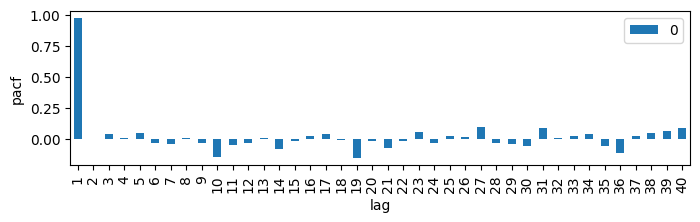

In [628]:
# acf, ci = sm.tsa.acf(endog, alpha=0.05)
def getSignificantLags(y, nLags = 5, alpha=0.05):
    pac, pac_ci = sm.tsa.pacf(x=y, nlags=nLags, alpha=alpha)
    pd.DataFrame(pac)[1:].plot(kind='bar', figsize=figsize, legend='pacf',
                               xlabel='lag', ylabel='pacf');
    significantLags = []
    for i in range(1, len(pac)):
        # print(pac[i], pac_ci[i][0], pac_ci[i][1])
        if pac[i] < pac_ci[i][0] - pac[i] or pac[i] > pac_ci[i][1] - pac[i]:
            significantLags.append(i)
    print('significantLags:', significantLags)
    return significantLags
e1_significantLags = getSignificantLags(y=nDj['e1(t)'], nLags = 40, alpha=0.05)

Let $e_t$ be the instance of $\varepsilon_t$. 

Thus, one can have $e_t$ as a function of $e_{t-1}, e_{t-10}, e_{t-19}, e_{t-27}, e_{t-36}$: 

$e_t = f(e_{t-1}, e_{t-10}, e_{t-19}, e_{t-27}, e_{t-36})$. 

In this way, the multivariate models studied during the classes of Computational Statistics can take place.

## Regression

Reference: [Géron, Aurélien. Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow. O'Reilly Media. 2019](https://universidadefe957-my.sharepoint.com/:b:/g/personal/paulo_firmino_ufca_edy_br/Ec_UL4nCLQRGnFpftnOkv5ABrePEllnHLR7rrqPreAvn6A?e=RFGcMB)

### Preprocessing

#### Feature Engineering

##### Lags

In [629]:
def appendLagVariables(yNm, significantLags, df, dropna=True):
    prefix = yNm.replace(')', '')
    df = df.copy()
    for lag in significantLags:
        varNm = prefix+'-'+str(lag)+')'
        # nDj = pd.concat([nDj, nDj[['e1(t)']].shift(lag)], axis=1)
        df[varNm] = df[yNm].shift(lag)
        # nDj.columns = nDj.columns + [varNm]
    if dropna:
        df.dropna(axis=0, inplace=True)
    display(df.head(2))
    return df
nDj = appendLagVariables(yNm='e1(t)', 
                         significantLags = e1_significantLags, 
                         df = nDj, 
                         dropna=True)

,date,y(t),p1(t),e1(t),e1(t-1),e1(t-2),e1(t-10),e1(t-19),e1(t-27),e1(t-36)
36,2022-08-03,32812.500000,31112.031393,1700.468607,1299.862236,1717.814459,920.045521,571.269821,813.188384,846.811123
37,2022-08-04,32726.820313,31127.755100,1599.065213,1700.468607,1299.862236,1066.382361,509.145724,735.044755,-44.961413


##### Linear modeling of the linear-time model residuals

In [630]:
y1Nm ='e1(t)'
x1Nms = [vNm for vNm in nDj.columns if 'e1(t-' in vNm]
y1Train = nDj[[y1Nm]]
x1Train = nDj[x1Nms]
display(y1Train[:3])
display(x1Train.iloc[:3,:])

,e1(t)
36,1700.468607
37,1599.065213
38,1659.989943


,e1(t-1),e1(t-2),e1(t-10),e1(t-19),e1(t-27),e1(t-36)
36,1299.862236,1717.814459,920.045521,571.269821,813.188384,846.811123
37,1700.468607,1299.862236,1066.382361,509.145724,735.044755,-44.961413
38,1599.065213,1700.468607,913.047326,329.111470,228.051516,-212.595276


In [631]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin_reg = LinearRegression() 
lin_reg.fit(x1Train, y1Train)

LinearRegression()

In [632]:
# xTrain.columns.tolist()
# lin_reg.coef_.tolist()[0]

,feature,coefficient,|coefficient|
0,e1(t-1),1.003872,1.003872
3,e1(t-19),-0.055931,0.055931
4,e1(t-27),0.038370,0.038370
5,e1(t-36),-0.018348,0.018348
1,e1(t-2),-0.013415,0.013415
2,e1(t-10),0.005053,0.005053


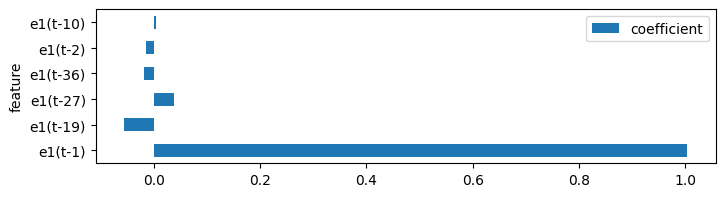

In [633]:
lin_regCoefsDf = pd.DataFrame({'feature':(x1Train.columns.tolist()), 
               'coefficient':lin_reg.coef_.tolist()[0],
               '|coefficient|':np.abs(lin_reg.coef_).tolist()[0]}).\
                   sort_values(by=['|coefficient|'], ascending=False)   
lin_regCoefsDf.plot(x='feature', y='coefficient', kind = 'barh', figsize=figsize);
display(lin_regCoefsDf)

In [634]:
nDj.columns

Index(['date', 'y(t)', 'p1(t)', 'e1(t)', 'e1(t-1)', 'e1(t-2)', 'e1(t-10)',
       'e1(t-19)', 'e1(t-27)', 'e1(t-36)'],
      dtype='object')

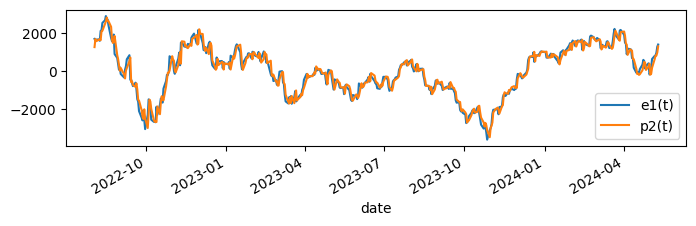

In [635]:
# figsize = (8, 2);
nDj['p2(t)'] = lin_reg.predict(X=x1Train)
nDj.plot(x = 'date', y=['e1(t)', 'p2(t)'], figsize=figsize);

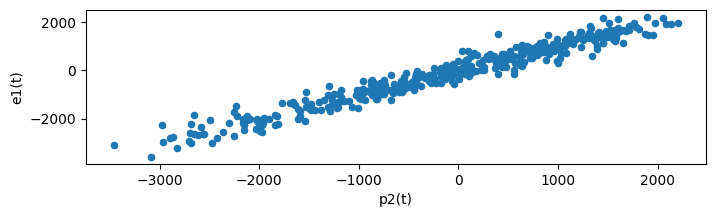

In [645]:
nDj.plot(x = 'p2(t)', y='e1(t)', figsize=figsize, kind='scatter');

###### More boosting

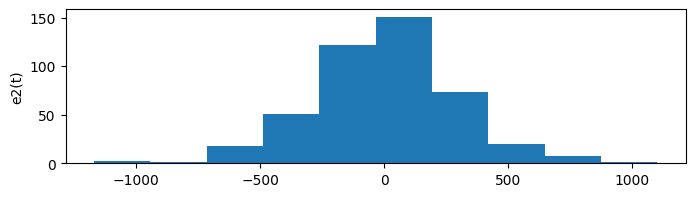

In [636]:
nDj['e2(t)'] = nDj['e1(t)'].subtract(nDj['p2(t)'])
nDj['e2(t)'].plot(kind='hist', figsize=figsize, 
                         ylabel = 'e2(t)');

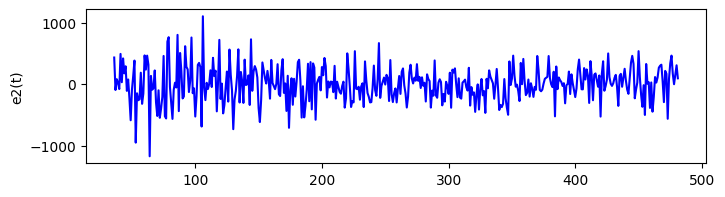

In [637]:
nDj['e2(t)'].plot(color='b', figsize=figsize, ylabel='e2(t)');

significantLags: [18, 35]


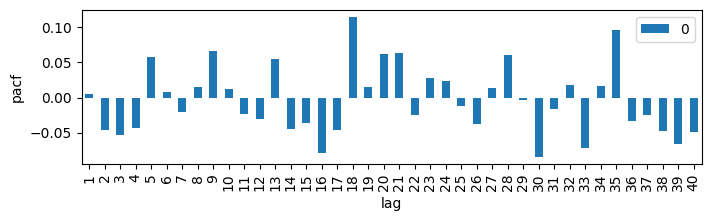

In [638]:
e2_significantLags = getSignificantLags(y=nDj['e2(t)'], nLags = 40, alpha=0.05)

In [639]:
nDj = appendLagVariables(yNm='e2(t)', 
                         significantLags = e2_significantLags, 
                         df = nDj, 
                         dropna=True)

,date,y(t),p1(t),e1(t),e1(t-1),e1(t-2),e1(t-10),e1(t-19),e1(t-27),e1(t-36),p2(t),e2(t),e2(t-18),e2(t-35)
71,2022-09-22,30076.679688,31662.361139,-1585.681451,-1462.858135,-924.683256,269.395462,1928.170544,2674.620357,1299.862236,-1485.209583,-100.471868,-950.006197,431.640291
72,2022-09-23,29590.410156,31678.084846,-2087.674690,-1585.681451,-1462.858135,630.863162,904.065978,2898.466963,1700.468607,-1540.945069,-546.729621,-148.771289,-95.104905


In [640]:
y2Nm ='e2(t)'
x2Nms = [vNm for vNm in nDj.columns if 'e2(t-' in vNm]
y2Train = nDj[[y2Nm]]
x2Train = nDj[x2Nms]
display(y2Train[:3])
display(x2Train.iloc[:3,:])

,e2(t)
71,-100.471868
72,-546.729621
73,-396.707721


,e2(t-18),e2(t-35)
71,-950.006197,431.640291
72,-148.771289,-95.104905
73,-261.590029,80.072684


In [641]:
lin_reg2 = LinearRegression() 
lin_reg2.fit(x2Train, y2Train)

LinearRegression()

,feature,coefficient,|coefficient|
0,e2(t-18),0.139276,0.139276
1,e2(t-35),0.055094,0.055094


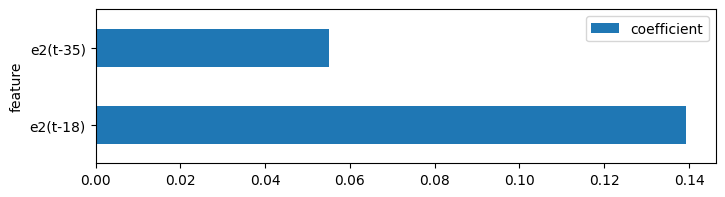

In [642]:
lin_reg2CoefsDf = pd.DataFrame({'feature':(x2Train.columns.tolist()), 
               'coefficient':lin_reg2.coef_.tolist()[0],
               '|coefficient|':np.abs(lin_reg2.coef_).tolist()[0]}).\
                   sort_values(by=['|coefficient|'], ascending=False)   
lin_reg2CoefsDf.plot(x='feature', y='coefficient', kind = 'barh', figsize=figsize);
display(lin_reg2CoefsDf)

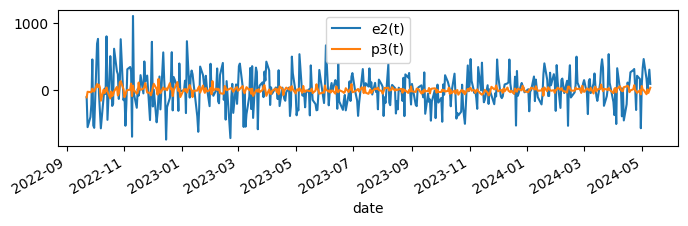

In [643]:
nDj['p3(t)'] = lin_reg2.predict(X=x2Train)
nDj.plot(x = 'date', y=['e2(t)', 'p3(t)'], figsize=figsize);

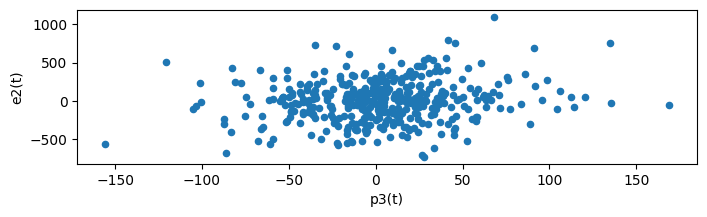

In [644]:
nDj.plot(x = 'p3(t)', y='e2(t)', figsize=figsize, kind='scatter');

###### Trying a XGBoost

In [650]:
# %pip install xgboost
import xgboost as xg
xgb_reg2 = xg.XGBRegressor(objective ='reg:squarederror', n_estimators = 50, 
                            seed = 0, max_depth = x2Train.shape[1])
xgb_reg2.fit(x2Train, y2Train)
# y_train_predictions = [round(y_hat) for y_hat in xgb_reg.predict(x_train)]


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=50, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

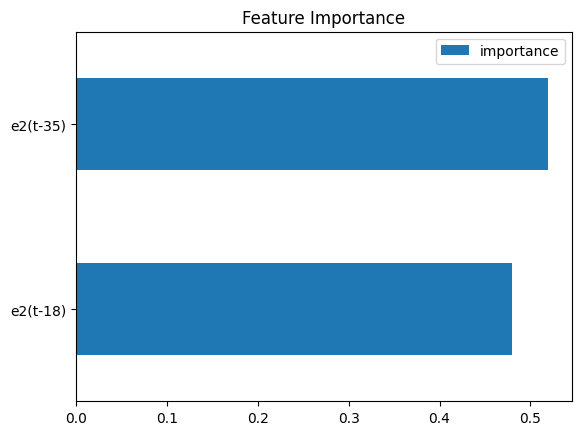

In [651]:
fi = pd.DataFrame(data=xgb_reg2.feature_importances_,
             index=x2Nms, #xgb_reg.feature_names_in_,
             columns=['importance'])
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

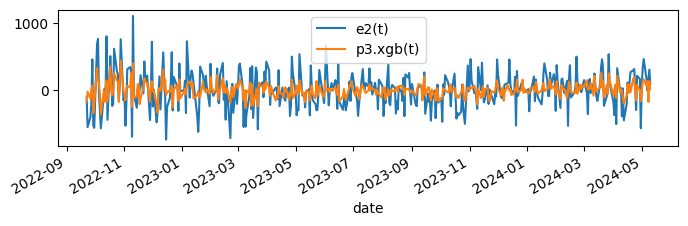

In [652]:
nDj['p3.xgb(t)'] = [round(y_hat) for y_hat in xgb_reg2.predict(x2Train)]
nDj.plot(x = 'date', y=['e2(t)', 'p3.xgb(t)'], figsize=figsize);

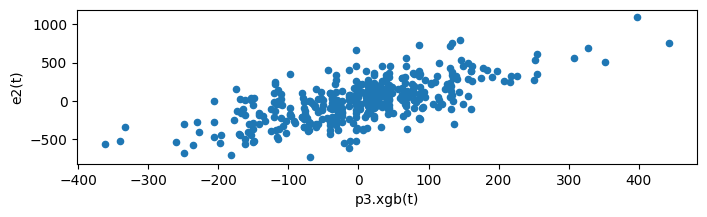

In [653]:
nDj.plot(x = 'p3.xgb(t)', y='e2(t)', figsize=figsize, kind='scatter');

#### Summing the boosting models

In [654]:
predModelsNms = [nm for nm in nDj.columns if 'p' in nm]
predModelsNms

['p1(t)', 'p2(t)', 'p3(t)', 'p3.xgb(t)']

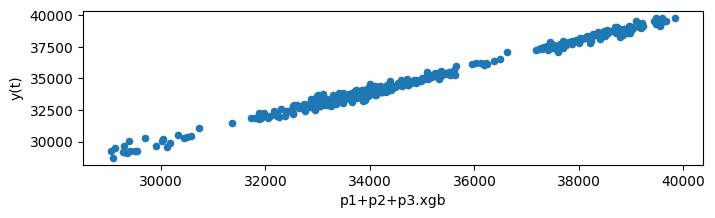

In [655]:
nDj['p1+p2+p3.xgb'] = nDj['p1(t)'].\
    add(nDj['p2(t)']).\
    add(nDj['p3.xgb(t)'])
nDj.plot(x = 'p1+p2+p3.xgb', y='y(t)', figsize=figsize, kind='scatter');

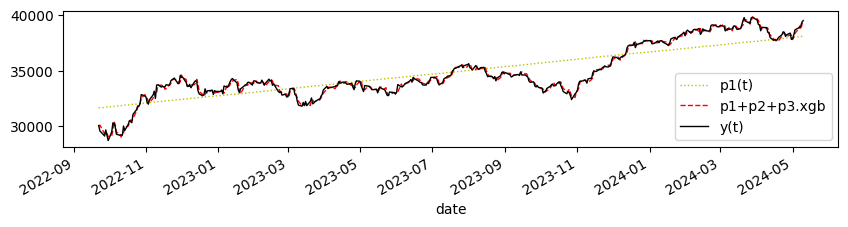

In [698]:
nDj.plot(x = 'date', y=['p1(t)', 'p1+p2+p3.xgb', 'y(t)'], 
         figsize=(10, 2), 
         style=[':','--','-'],
         color=['y','red','black'],
         linewidth=1
         );